In [6]:
import sys
import os
sys.path.append(os.getcwd())
# print(os.path.realpath(os.getcwd()))
from data_generator import data_generator, uni_instance_gen, generate_graph_from_data

nj=5
nm=5
high=99
low=1
times,machines=uni_instance_gen(nj,nm,low,high)
print(f"processing times\n{times}\n machine use\n {machines}")




processing times
[[72 39 26 34 54]
 [ 3 50 12 65 54]
 [ 5 94 94 57 17]
 [47 23 79 85 14]
 [66 75 51 38 64]]
 machine use
 [[0 1 3 4 2]
 [1 4 2 3 0]
 [3 0 1 4 2]
 [1 2 0 4 3]
 [3 4 2 0 1]]


times- is an (nj,nm) np array denoting the processing time of every operation in each job. 
machine- is an (nj,nm) np array denoting the machine each operation uses.
In the next cell graph data will be generated from the times and machine np arrays

In [ ]:
graph_data = generate_graph_from_data(nj, nm, times, machines)
print(graph_data)

JSSPData(x=[27, 8], edge_index=[2, 30], reversed_edge_index=[2, 30], op_machine_map=[27], processing_times=[27], num_mach=5, machine_avail_time=[5], machine_last_op=[5], op_end_time=[27], graph_id_offset=[1], mask=[27], remaining_processing_time=[27], est_end_time=294.0)


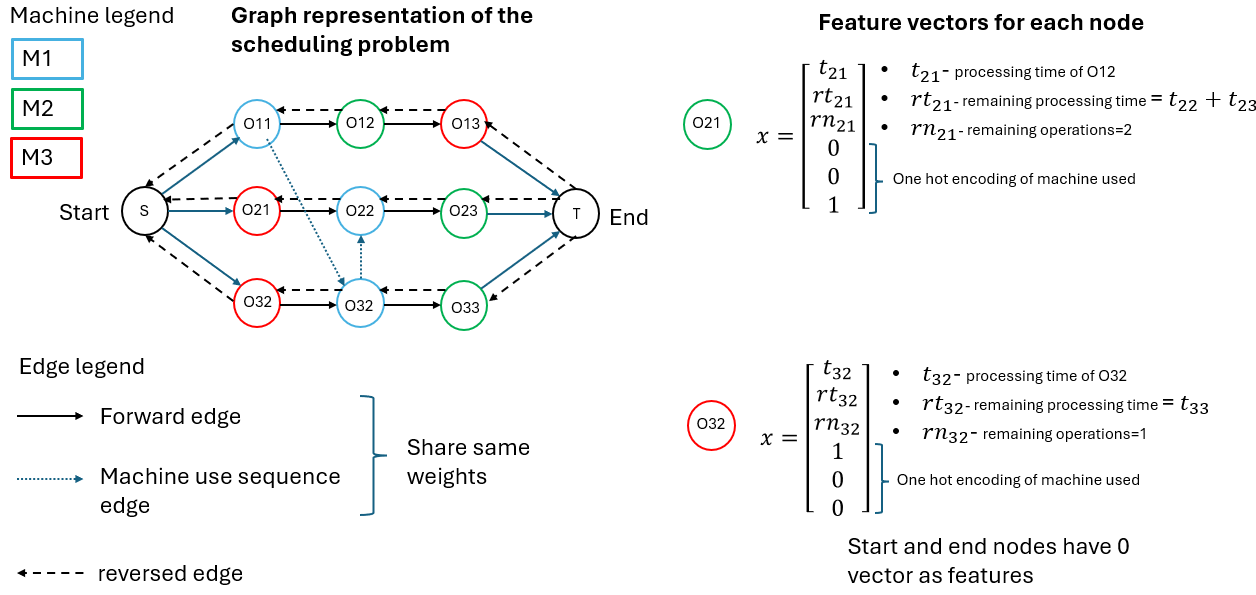
graph_data is an instance of JSSPData containing $nj \times nm+2$ nodes It consists of the following attributes

**x**- node features. _size_ _(nj*nm+2,nm+2)_\
**edge_index**-contains the edges in the graph. _size_ _(2,nj(nm+1))_\
**reversed_edge_index**-contains the edges in reverse (more about this later). _size_ _(2,nj(nm+1))\
**op_machine_map**-a list containing a mapping of operation (node) to the machine it uses. _size_ _(njnm+2,)_\
**processing_times**- processing time of each operation (node). _size_ _(nj*nm+2,)_\
**machine_avail_time**- earliest time a machine is available. _size_ _(nm,)_\
**machine_last_op**- operation assigned to machine currently. _size_ _(nm,)_\
**op_end_time**- end time of each operation. _size_ _(nj*nm+2)_\
**remaining_processing_time**- remaining processing time remaining after each operation. _size_ (nj*nm+2,) \
**graph_id_offset**- useful when batching- an index to capture when each graph begins equals 1 for a single graph\
**est_end_time** - estimation of the make span. Calculated as max of sum of processing times amongst all jobs

In [ ]:
# job parameters
param_dict={'nj':10,# number of jobs
            'nm':10,# number of machines
            'low':1,#min processing time
            'high':99,# max processing time (actual values will be distributed uniformly between min and max)
            'instances':300,# number of total problem instances
            'batch_size':10,}#batch size. Increase this to a large value if using a GPU